In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

### Getting dataset and basic info.

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
# top and last rows to get to know the dataset.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
# shape of the daa set: 303 rows 14 variables (columns)
data.shape

(303, 14)

In [18]:
# data types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# here we can notice that the data containes no null values which is a good indicator. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
pd.value_counts(data.values.flatten())

0.0      1283
1.0       955
2.0       446
3.0       165
130.0      40
         ... 
341.0       1
340.0       1
217.0       1
101.0       1
322.0       1
Length: 305, dtype: int64

# Data distributions & correlations

/home/jmadrazo7/Dev/ufm/machineLearning/sandbox/env/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ab32a87a5f8>,
      dtype=object)

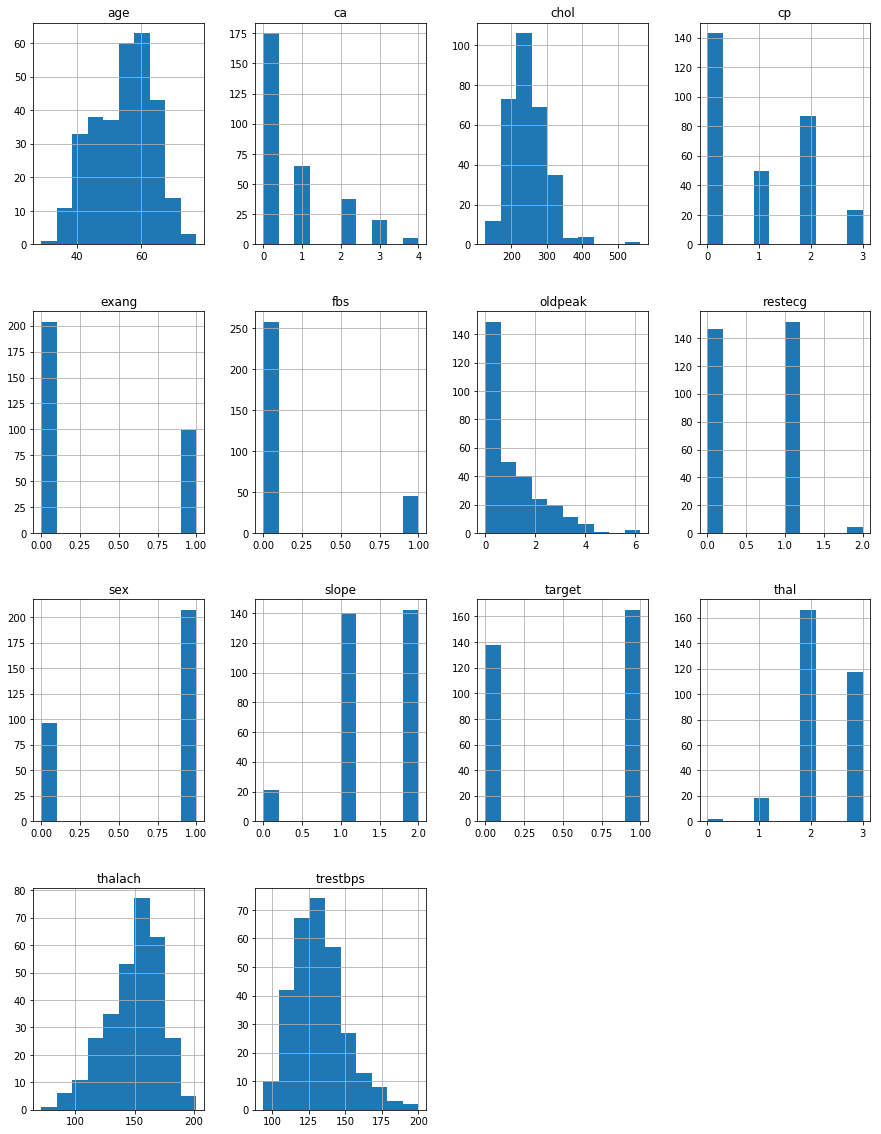

In [20]:
# histogram plots to know how variables are distributed compared to a normal distribution.
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ab3287a4d30>,
      dtype=object)

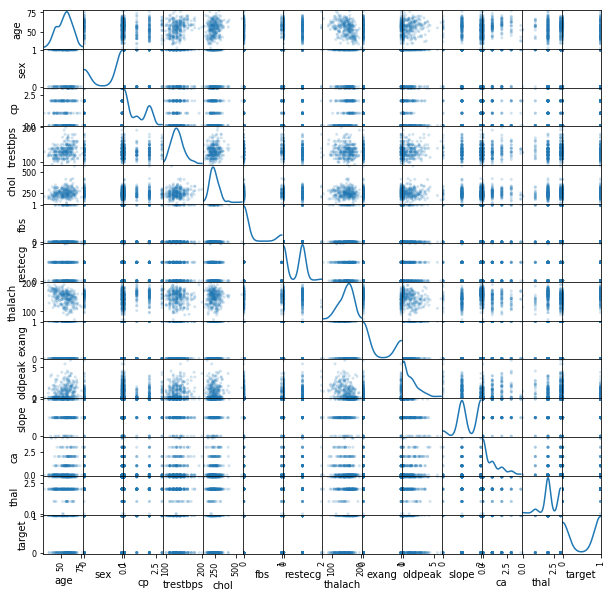

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [35]:
def get_regplot(data,y):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(15,15))
    for i in data:
        axtemp = fig.add_subplot(5,5,cont)
        fig.tight_layout(pad=2.0)
        sns.regplot(x=data[y], y=data[i], data=data)
        plt.title(i)
        cont += 1
    plt.show()

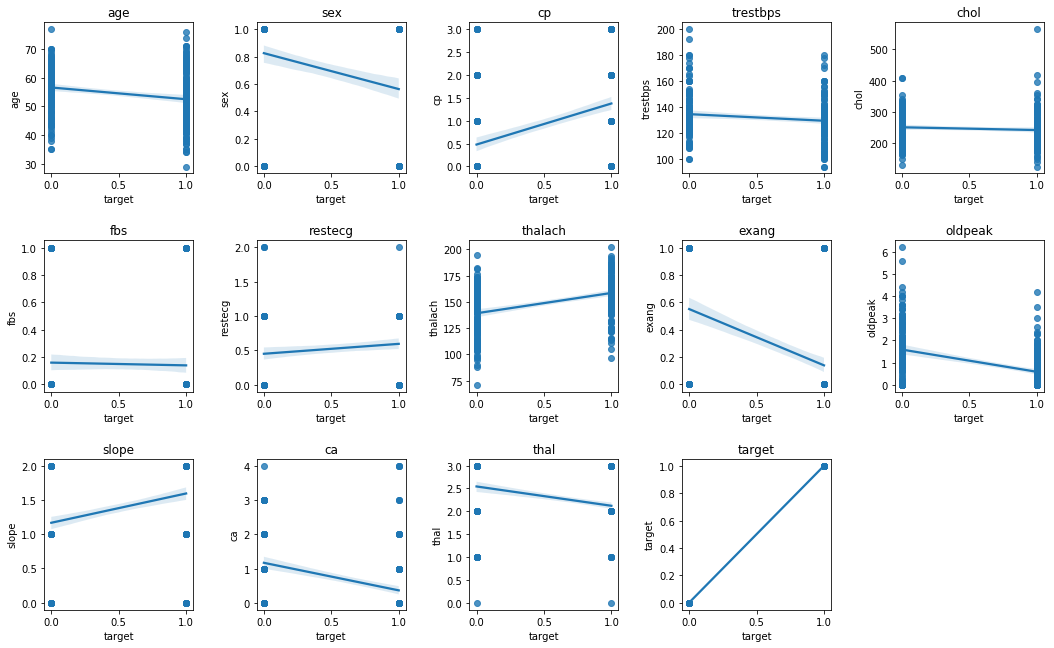

In [36]:
# checking for linear regresions between variables and target
get_regplot(data,'target')

# Model implementation

## Cost functions

In [107]:
# basic logistic function
def logistic(X, thetas):
    mult = X @ thetas.T
    return 1 / (1 + np.e ** (-mult))

In [143]:
# basic cost function
def cost_fn(X,y,thetas):
    hip = logistic(X, thetas)
    m = X.shape[0] # use len(x)? or = -1 / m
    to_sum = (y * np.log(hip)) + ((1 - y) * np.log(1 - hip)) # basic function
    return np.sum(to_sum)/ - m

In [132]:
# function to get the derivate
# separated the function to make it more "modular"
def derivate(X,y,thetas):
    hip = logistic(X, thetas)
    to_sum = X * (hip - y) # or use .T
    return (1 / len(X)) * (to_sum @ X).T

In [141]:
# gradient descent funciton where:
# X dependent variable with 1s appended
# y independent variables
# a learning rate
# ir number of iterations to run

# gradient descent function
def grdDsc2(X,y,thetas,a,it):
    cost = np.zeros(it)
    for i in range(it):
        hip = logistic(X,thetas)
        to_sum = X * (hip - y)
        thetas = thetas - (a/len(X)) * np.sum(to_sum, axis=0)
        # calling cost function
        cost[i] = cost_fn(X, y, thetas)
        
    # return cost and thethas together
    return thetas,cost

In [145]:
def call_grdDsc(X,y,thetas,a,it):
    #running the gd, derivate and cost function
    g,cost = grdDsc2(X,y,thetas,a,it)

    initialCost = cost_fn(X,y,thetas)
    #print("Initial Cost:",initialCost)
    change = (abs(cost[-1]-initialCost)/initialCost) * 100
    
    # plotting cost
    fig, ax = plt.subplots()  
    ax.plot(np.arange(it), cost, 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('Cost')  
    ax.set_title('Error vs. Training iterations') 
    print("Initial Cost:",initialCost,"- Final Cost:",cost[-1], " - Improvement:",change,"%")
    return g

## Data preparation

In [84]:
# normalizing data using fit_transform
def normalize(data):
    mm_scaler = preprocessing.MinMaxScaler()
    d = mm_scaler.fit_transform(data)
    df = pd.DataFrame(d)
    df.head()
    return df

In [85]:
data = normalize(data)

In [87]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [93]:
data.iloc[:,0:13]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [95]:
data.iloc[:,13:14]

,13
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
298,0.0
299,0.0
300,0.0
301,0.0


In [96]:
# --------- normalized data & variables separation ---------

# copying data to avoid modyfing too much the original df
data_in = data.copy()
x_in = data_in.iloc[:,0:13]
unos = np.ones([len(x_in),1])
x_in = np.concatenate((unos,x_in),axis=1)
y_in = data_in.iloc[:,13:14].values
dfx = pd.DataFrame(x_in)

In [97]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,1.0,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,1.0,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,1.0,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,1.0,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [98]:
X_train, X_test, y_train, y_test = train_test_split(x_in, y_in, test_size=0.20, random_state=42)

## Evaluating

In [159]:
# configurating hyperparams and thetas
thetas_in = np.zeros([1,14])
a = 0.1
it = 10000

Initial Cost: 0.6931471805599453 - Final Cost: 0.3491022545377414  - Improvement: 49.63519086152438 %


array([[ 2.06427664, -0.3721911 , -1.72168874,  2.51874651, -1.68113388,
        -1.13077431,  0.32402668,  1.164262  ,  2.50431001, -1.13525934,
        -3.4767195 ,  1.70331758, -3.34314664, -2.73068545]])

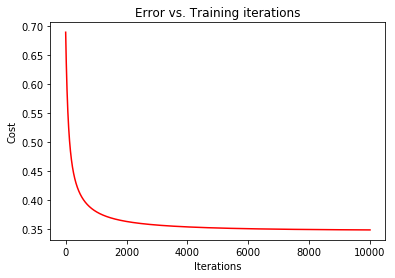

In [160]:
# using all variables together
call_grdDsc(X_train,y_train,thetas_in,a,it)

In [ ]:
'''
Puego concluir que con el método de regresión logistica tenemos una mejora del ~ 50% del costo.

Al evalua con mulitples combinaciones de Alpha y numero de iteraciones me puedo dar cuenta que funciona mejor con learning rates (alpha) grandes. Pués se acerca a 0 en un número de iteraciones menor. 

'''